**Homework 7**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this assignment we'll look at the classic "cars" dataset. You can read about it here:
[link](https://vincentarelbundock.github.io/Rdatasets/doc/causaldata/auto.html)

In [4]:
cars=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/causaldata/auto.csv')
cars.head(3)

,rownames,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,1,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,0
1,2,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,0
2,3,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,0


At first, we'll just focus on finding a relationship between the `displacement` and `mpg` columns. 

In [6]:
disp=np.array(cars.displacement)
mpg=np.array(cars.mpg)

Let's take a look at them:

Text(0, 0.5, 'MPG')

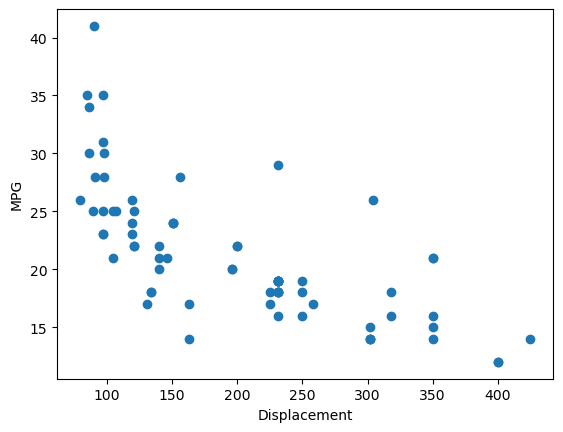

In [8]:
plt.scatter(disp, mpg)
plt.xlabel('Displacement')
plt.ylabel('MPG')

Problem 1.

Create a class that finds a linear model describing the relationship between arrays `X` and `y` (you may assume each are 1-dimensional). This model should be created using only the highest and lowest values in `X`, and the corresponding values in `y`.   

In [10]:
print(disp)
print(sorted(disp))



[121 258 121 196 350 231 304 196 231 231 425 350 350 231 250 200 200 151
 250  98 318 318 225  98 140 400 400 302 140 302 302 250 302 140 350 231
 231 231 231 151 350 156  86 105 119 225 231 231 231 231 231 151 131  97
 121 119  85 119 146 105 107  91  86 163  79  97 134  97 134  97  90  89
  97 163]
[79, 85, 86, 86, 89, 90, 91, 97, 97, 97, 97, 97, 98, 98, 105, 105, 107, 119, 119, 119, 121, 121, 121, 131, 134, 134, 140, 140, 140, 146, 151, 151, 151, 156, 163, 163, 196, 196, 200, 200, 225, 225, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 250, 250, 250, 258, 302, 302, 302, 302, 304, 318, 318, 350, 350, 350, 350, 350, 400, 400, 425]


In [11]:
class MaxMinLinearRegression():
    def __init__(self):
        '''No init function needed,
        since there are no hyperparameters'''
        pass
    
    def fit(self,X,y): 
        '''stores the slope and intercept 
        for the model defined by X and y'''
        max_i = np.argmax(X)
        min_i = np.argmin(X)

        self.coef= (y[max_i] - y[min_i]) /(X[max_i] - X[min_i])
        # y = mx + b ======> b = mx/y
        # solve for b when x = 0
        self.intercept= y[min_i] - self.coef * X[min_i] # np.argmin is the index of the smallest x value
        
    def predict(self,x):
        return x * self.coef + self.intercept

If you did this problem correctly, the following code will create a linear model that can predict `mpg` from `disp`. 

In [13]:
lin_mod1=MaxMinLinearRegression()
lin_mod1.fit(disp,mpg)

To use your model to predict the `mpg` of an unknown car with `disp=200`, you would run this code:

In [15]:
lin_mod1.predict(200)

21.803468208092486

Run this to visualize your model's predictions, as compared to the actual:

Text(0, 0.5, 'MPG')

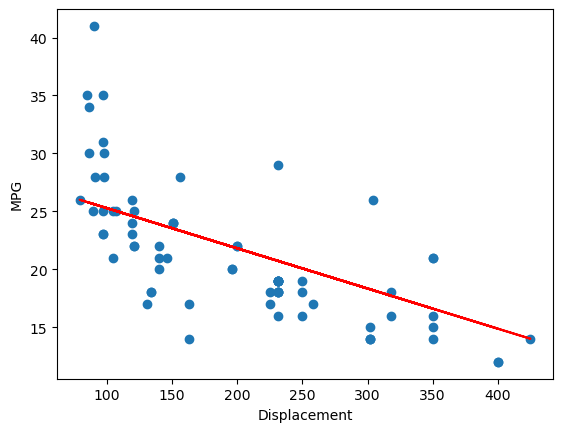

In [17]:
plt.scatter(disp,mpg)
plt.plot(disp,lin_mod1.predict(disp),'-r')
plt.xlabel('Displacement')
plt.ylabel('MPG')

Calculate the RSS of `lin_mod1`.

In [19]:
preds = lin_mod1.predict(disp)
RSS1= np.sum((mpg - preds)**2)
RSS1

1312.203548397875

Problem 2.

Create a class that finds a linear model describing the relationship between an array `X` of shape (num_observations,num_features) and a 1-dimensional array `y`, that minimizes the RSS. 

In [21]:
class LinearRegression():
    def __init__(self):
        pass
    
    def fit(self,X,y): 
        '''stores the slope and intercept 
        for the model defined by X and y'''
        # In lecture we found that the coefficients equivalent to (X.tX)^-1 (X.Ty)
        # Feature engineering for the constant using the np.c_ function to add a column on the end of X
        newX = np.c_[np.ones(X.shape[0]), X]
        normal_eq = np.linalg.inv(newX.T @ newX) @ (newX.T @ y)
        print(normal_eq)
        self.intercept= normal_eq[0]
        self.coef= normal_eq[1 :]
        print(self.intercept, self.coef)
    def predict(self,x):
        '''x is expected to have shape 
        (num_test_obs,num_feats)'''
        # x = x[0]
        print(x)
        print(self.coef)
        # print(self.intercept)     
        print(type(x))
        print(type(self.coef))   
        return x @ self.coef + self.intercept

To build a model to predict `mpg` from `disp`, we'll have to convert `disp` into an array of the correct shape:

In [23]:
X=disp[:,np.newaxis]

We now build the model, and fit it to the data:

In [25]:
lin_mod2=LinearRegression()
lin_mod2.fit(X,mpg)

[30.06787772 -0.04445363]
30.067877717529203 [-0.04445363]


To use this model to make a prediction on an unknown car with `disp=200`, you'll need to feed that value in as an array, rather than a single number.

In [27]:
# lin_mod2.predict(200)
lin_mod2.predict([200]) #Do this instead


[200]
[-0.04445363]
<class 'list'>
<class 'numpy.ndarray'>


21.177152360033844

Run this code to visualize your model. Does it look better than the previous model?

[[121]
 [258]
 [121]
 [196]
 [350]
 [231]
 [304]
 [196]
 [231]
 [231]
 [425]
 [350]
 [350]
 [231]
 [250]
 [200]
 [200]
 [151]
 [250]
 [ 98]
 [318]
 [318]
 [225]
 [ 98]
 [140]
 [400]
 [400]
 [302]
 [140]
 [302]
 [302]
 [250]
 [302]
 [140]
 [350]
 [231]
 [231]
 [231]
 [231]
 [151]
 [350]
 [156]
 [ 86]
 [105]
 [119]
 [225]
 [231]
 [231]
 [231]
 [231]
 [231]
 [151]
 [131]
 [ 97]
 [121]
 [119]
 [ 85]
 [119]
 [146]
 [105]
 [107]
 [ 91]
 [ 86]
 [163]
 [ 79]
 [ 97]
 [134]
 [ 97]
 [134]
 [ 97]
 [ 90]
 [ 89]
 [ 97]
 [163]]
[-0.04445363]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0, 0.5, 'MPG')

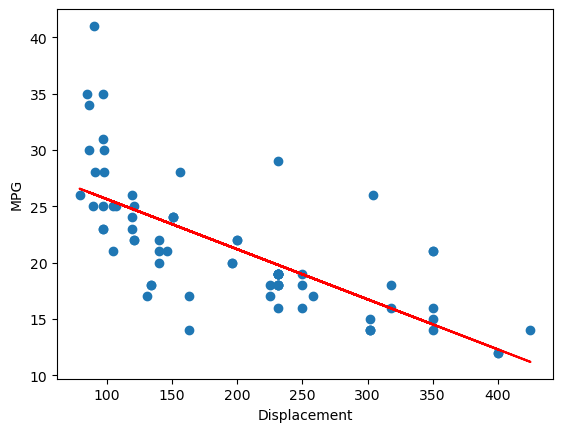

In [29]:
plt.scatter(disp,mpg)
plt.plot(disp,lin_mod2.predict(X),'-r')
plt.xlabel('Displacement')
plt.ylabel('MPG')

Calculate the RSS of `lin_mod2`.

In [31]:
linmod2_preds = lin_mod2.predict(X)
print(linmod2_preds)
print(mpg)
print((mpg-linmod2_preds)**2)
print(mpg.shape)
RSS2=np.sum((mpg-linmod2_preds)**2)
# RSS2=np.sum(np.square(mpg-linmod2_preds))

RSS2

[[121]
 [258]
 [121]
 [196]
 [350]
 [231]
 [304]
 [196]
 [231]
 [231]
 [425]
 [350]
 [350]
 [231]
 [250]
 [200]
 [200]
 [151]
 [250]
 [ 98]
 [318]
 [318]
 [225]
 [ 98]
 [140]
 [400]
 [400]
 [302]
 [140]
 [302]
 [302]
 [250]
 [302]
 [140]
 [350]
 [231]
 [231]
 [231]
 [231]
 [151]
 [350]
 [156]
 [ 86]
 [105]
 [119]
 [225]
 [231]
 [231]
 [231]
 [231]
 [231]
 [151]
 [131]
 [ 97]
 [121]
 [119]
 [ 85]
 [119]
 [146]
 [105]
 [107]
 [ 91]
 [ 86]
 [163]
 [ 79]
 [ 97]
 [134]
 [ 97]
 [134]
 [ 97]
 [ 90]
 [ 89]
 [ 97]
 [163]]
[-0.04445363]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[24.68898888 18.59884201 24.68898888 21.35496687 14.50910834 19.79908993
 16.55397517 21.35496687 19.79908993 19.79908993 11.17508633 14.50910834
 14.50910834 19.79908993 18.95447102 21.17715236 21.17715236 23.35538007
 18.95447102 25.71142229 15.9316244  15.9316244  20.06581169 25.71142229
 23.84436997 12.286427   12.286427   16.64288243 23.84436997 16.64288243
 16.64288243 18.95447102 16.64288243 23.84436997 14.50

1226.7841189255553

Problem 3.

We'll now bring in more features to see if we can predict `mpg` more accurately:

In [33]:
wt=np.array(cars.weight)
gr=np.array(cars.gear_ratio)

We build a feature matrix using displacement, weight, and gear ratio:

In [35]:
DWG=np.array([disp,wt,gr]).T

Now create a new linear model to predict `mpg` from the feature matrix `DWG`.

In [37]:
lin_mod3= LinearRegression()
lin_mod3.fit(DWG, mpg)

[ 3.75641063e+01  7.68600286e-03 -6.53381885e-03  6.45257631e-01]
37.56410628437516 [ 0.007686   -0.00653382  0.64525763]


Predict the `mpg` for a car with a displacement of 200, weight equal to 3000, and gear ratio 3.

In [39]:
prediction=lin_mod3.predict([200.,3000., 3.])
prediction

[200.0, 3000.0, 3.0]
[ 0.007686   -0.00653382  0.64525763]
<class 'list'>
<class 'numpy.ndarray'>


21.435623192355855

Calculate the RSS of `better_mod`.

In [41]:
preds = lin_mod3.predict(DWG)
RSS3= np.sum((preds - mpg)**2)
RSS3

[[1.21000000e+02 2.93000000e+03 3.57999992e+00]
 [2.58000000e+02 3.35000000e+03 2.52999997e+00]
 [1.21000000e+02 2.64000000e+03 3.07999992e+00]
 [1.96000000e+02 3.25000000e+03 2.93000007e+00]
 [3.50000000e+02 4.08000000e+03 2.41000009e+00]
 [2.31000000e+02 3.67000000e+03 2.73000002e+00]
 [3.04000000e+02 2.23000000e+03 2.86999989e+00]
 [1.96000000e+02 3.28000000e+03 2.93000007e+00]
 [2.31000000e+02 3.88000000e+03 2.93000007e+00]
 [2.31000000e+02 3.40000000e+03 3.07999992e+00]
 [4.25000000e+02 4.33000000e+03 2.27999997e+00]
 [3.50000000e+02 3.90000000e+03 2.19000006e+00]
 [3.50000000e+02 4.29000000e+03 2.24000001e+00]
 [2.31000000e+02 2.11000000e+03 2.93000007e+00]
 [2.50000000e+02 3.69000000e+03 2.55999994e+00]
 [2.00000000e+02 3.18000000e+03 2.73000002e+00]
 [2.00000000e+02 3.22000000e+03 2.73000002e+00]
 [1.51000000e+02 2.75000000e+03 2.73000002e+00]
 [2.50000000e+02 3.43000000e+03 2.55999994e+00]
 [9.80000000e+01 2.12000000e+03 3.53999996e+00]
 [3.18000000e+02 3.60000000e+03 2.470000

846.0790745646772